## Assignment 1 of Computer Vision
author : Anurag Gupta
Email : anuragsgupta9211@gmail.com

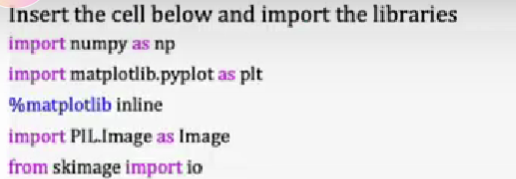

In [203]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import PIL.Image as images
from skimage import io
import cv2 as cv

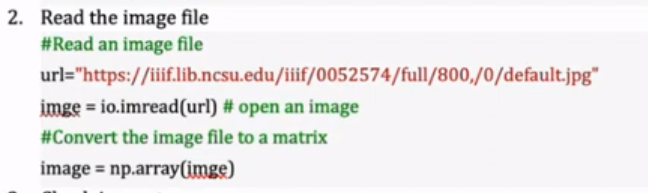

In [204]:
url = "./images/school.jpg"
# opening Image
og_img = io.imread(url)

# Converting the image file to a matrix
m_img = np.array(og_img)
m_img = m_img.astype("int")
# gryimge = grey_image.astype("int")

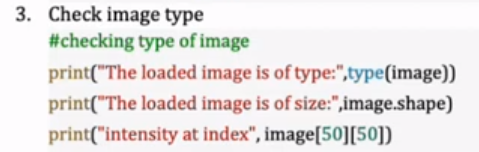

In [205]:
print("Type of loaded Image", type(m_img))
print("Shape of loaded Image", og_img.shape)
print("Intensity at index ", og_img[50][50])

Type of loaded Image <class 'numpy.ndarray'>
Shape of loaded Image (552, 800, 3)
Intensity at index  [114 170 219]


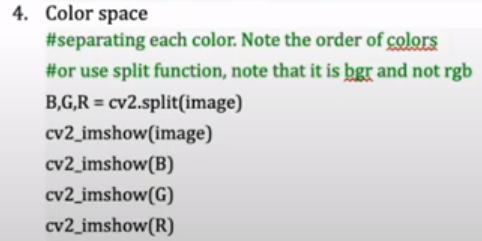

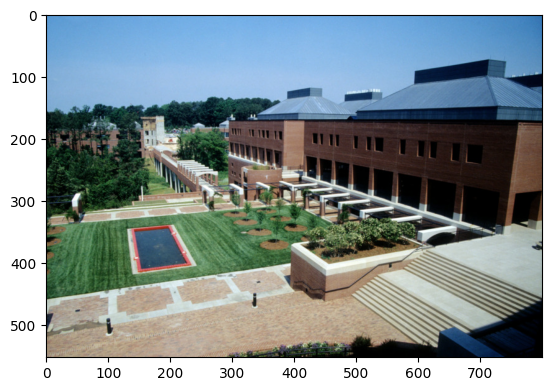

In [206]:
B,G,R = cv.split(m_img)

plt.imshow(m_img)

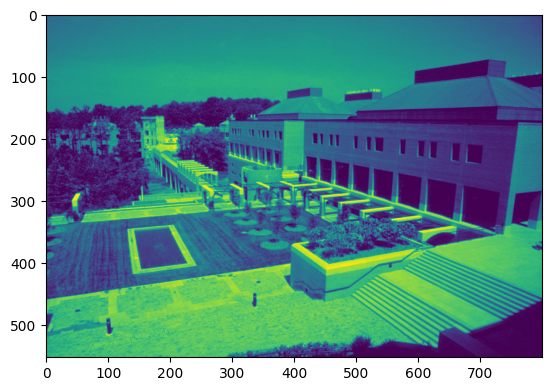

In [207]:
plt.imshow(B)

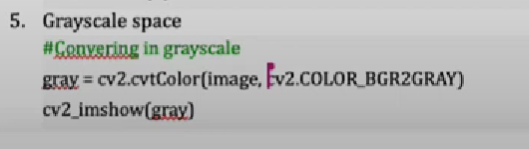

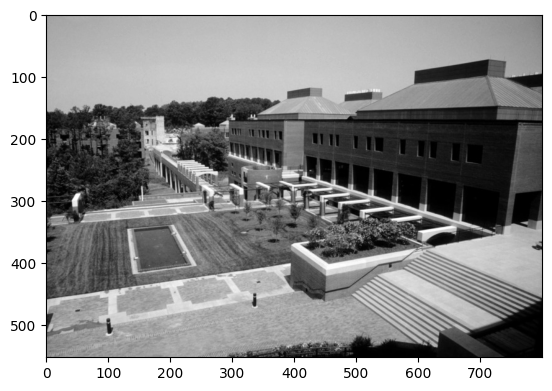

In [208]:
gray_image = cv.cvtColor(og_img,cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap=plt.get_cmap('gray'))

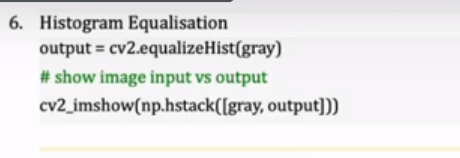

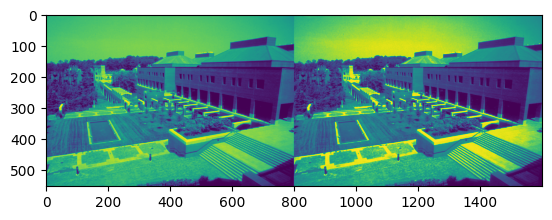

In [209]:
hist_equalis = cv.equalizeHist(gray_image)
plt.imshow(np.hstack([gray_image,hist_equalis]))

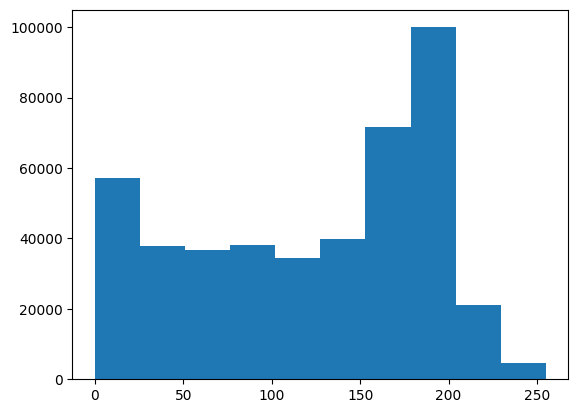

In [210]:
plt.hist(gray_image.ravel())
plt.show()

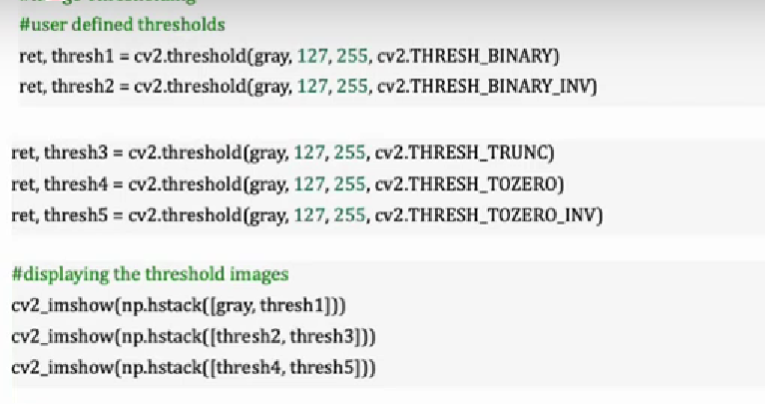

In [211]:
ret, thresh1 = cv.threshold(gray_image, 127,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(gray_image, 127,255,cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(gray_image, 127,255,cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(gray_image, 127,255,cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(gray_image, 127,255,cv.THRESH_TOZERO_INV)

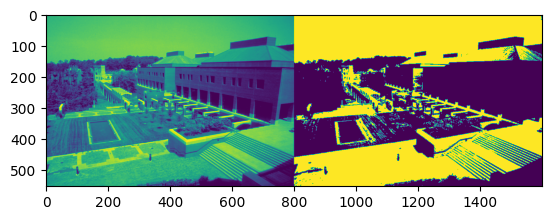

In [212]:
plt.imshow(np.hstack([gray_image,thresh1]))


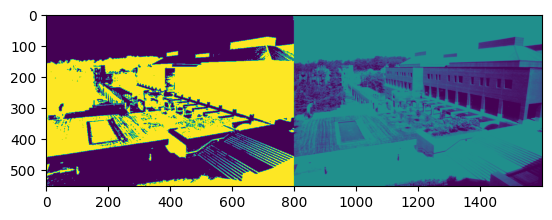

In [213]:
plt.imshow(np.hstack([thresh2,thresh3]))


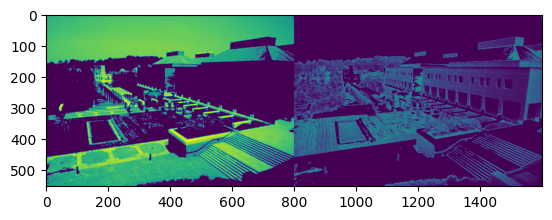

In [214]:
plt.imshow(np.hstack([thresh4,thresh5]))

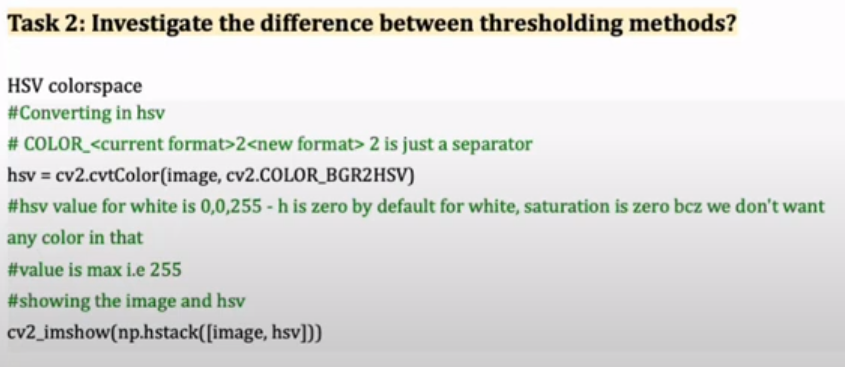

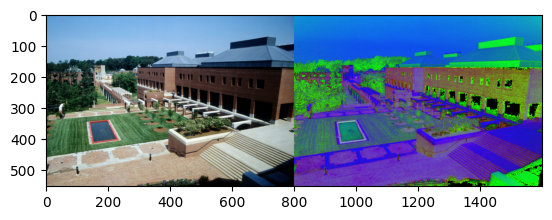

In [215]:
hsv = cv.cvtColor(og_img,cv.COLOR_BGR2HSV)
plt.imshow(np.hstack([og_img,hsv]))

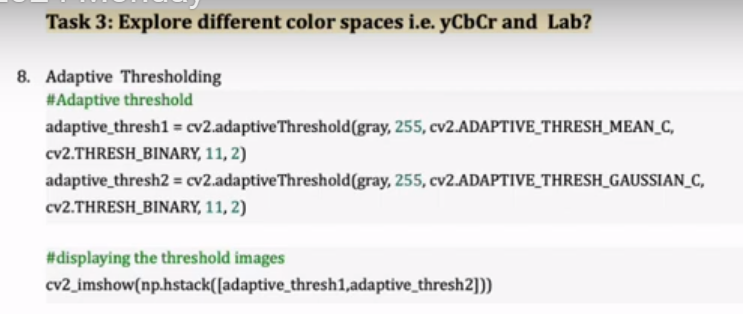

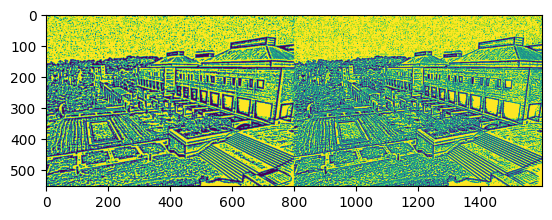

In [216]:
adaptive_thresh1 = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_MEAN_C,
                                        cv.THRESH_BINARY,11,2)
adaptive_thresh2 = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv.THRESH_BINARY,11,2)

plt.imshow(np.hstack([adaptive_thresh1,adaptive_thresh2]))

## Filtering

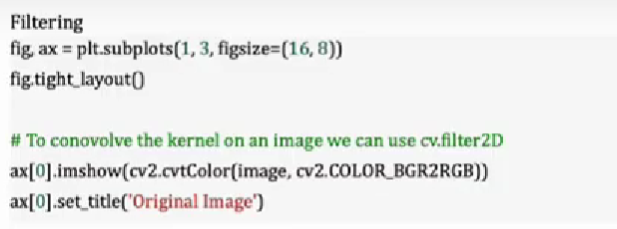

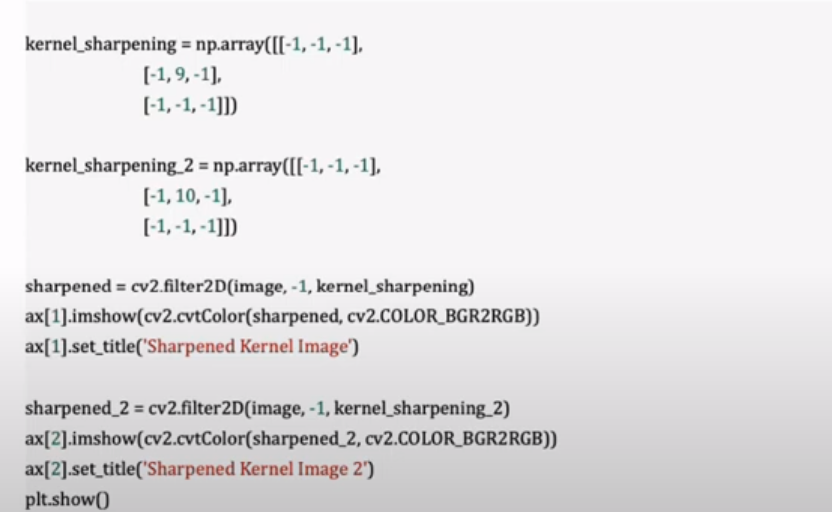

In [217]:
kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
kernel_sharpening_2 = np.array([[-1,-1,-1],[-1,10,-1],[-1,-1,-1]])

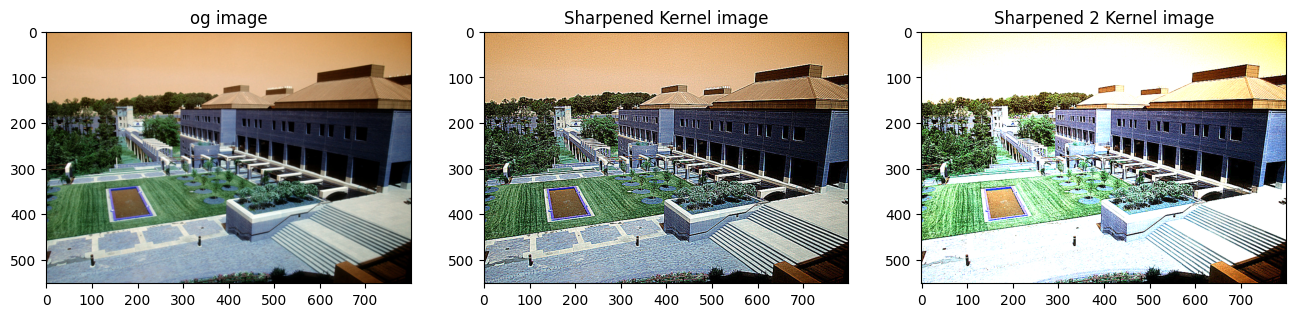

In [218]:
fig, ax = plt.subplots(1,3,figsize=(16,8))
# fig.tight_layout()

ax[0].imshow(cv.cvtColor(og_img,cv.COLOR_BGR2RGB))
ax[0].set_title('og image')

sharpened = cv.filter2D(og_img,-1,kernel_sharpening)
sharpened2 = cv.filter2D(og_img,-1,kernel_sharpening_2)

ax[1].set_title('Sharpened Kernel image')
ax[1].imshow(cv.cvtColor(sharpened,cv.COLOR_BGR2RGB))

ax[2].set_title('Sharpened 2 Kernel image')
ax[2].imshow(cv.cvtColor(sharpened2,cv.COLOR_BGR2RGB))
# plt.show()

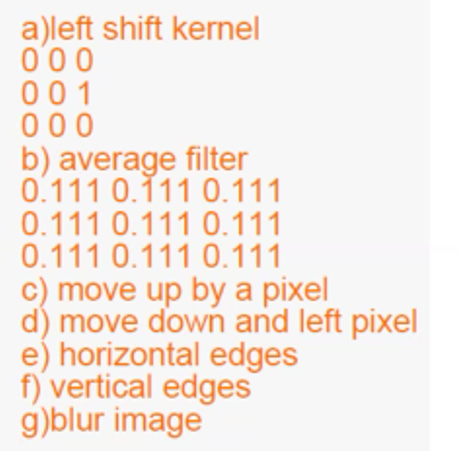

In [232]:
left, right, up, down = 1,1,1,1
# left, right, up, down = 2,2,2,2
# left, right, up, down = 3,3,3,3
# left, right, up, down = 5,5,5,5
depth = -1

left_shift_kernel = np.array([[0,0,0],
                     [0,0,left],
                     [0,0,0]]
)
right_shift_kernel = np.array([[0,0,0],
                      [right,0,0],
                      [0,0,0]])

up_shift_kernel = np.array([[0,up,0],
                   [0,0,0],
                   [0,0,0]])

down_shift_kernel = np.array([[0,0,0], 
                     [0,0,0],
                     [0,down,0]])

down_left_shift_kernel = np.array([[0,0,0],
                          [0,0,left],
                          [0,down,0]])

blur_kernel = np.array([[0.111,0.111,0.111],
                          [0.111,0.111,0.111],
                          [0.111,0.111,0.111]])


# sharpened = cv.filter2D(og_img,-1,kernel_sharpening)

# sharpened2 = cv.filter2D(og_img,-1,kernel_sharpening_2)
# ax[1].set_title('Sharpened Kernel image')
# ax[1].imshow(cv.cvtColor(sharpened,cv.COLOR_BGR2RGB))
# fig.add_subplot(2,2,1)
# plt.imshow(og_img)

In [246]:
left_shift_img = cv.filter2D(og_img,depth,left_shift_kernel)
right_shift_img = cv.filter2D(og_img,depth,right_shift_kernel)
up_shift_img = cv.filter2D(og_img,depth,up_shift_kernel)
down_shift_img = cv.filter2D(og_img,depth,down_shift_kernel)
down_left_shift_img = cv.filter2D(og_img,depth,down_left_shift_kernel)

blur_kernel_img = cv.filter2D(og_img,depth,blur_kernel)

# ax[1].set_title('Sharpened Kernel image')
# ax[1].imshow(cv.cvtColor(sharpened,cv.COLOR_BGR2RGB))
# fig.add_subplot(2,2,1)
# plt.imshow(og_img)

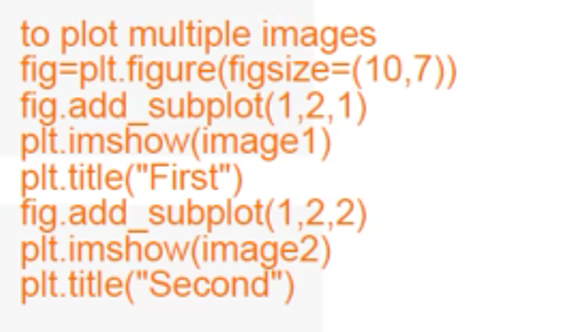

Text(0.5, 1.0, 'blur_kernel')

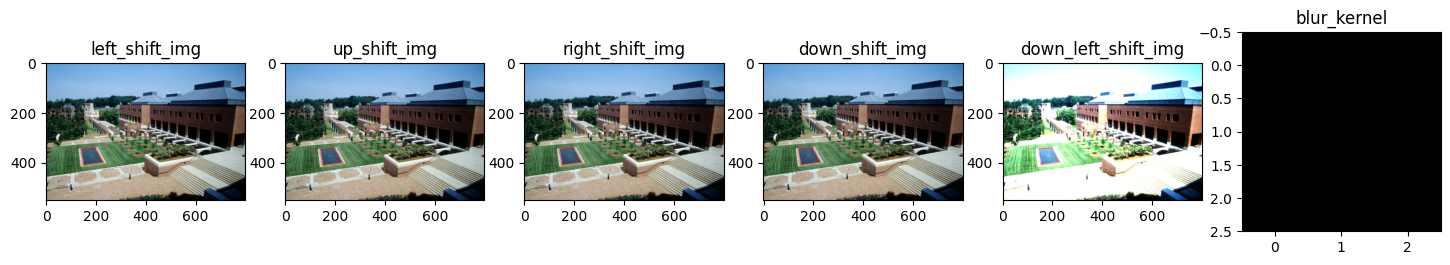

In [247]:
fig = plt.figure(figsize=(18,7))
fig.tight_layout()
row = 2
col = 6

fig.add_subplot(row,col,1)
plt.imshow(left_shift_img)
plt.title("left_shift_img")

fig.add_subplot(row,col,2)
plt.imshow(up_shift_img)
plt.title("up_shift_img")

fig.add_subplot(row,col,3)
plt.imshow(right_shift_img)
plt.title("right_shift_img")


fig.add_subplot(row,col,4)
plt.imshow(down_shift_img)
plt.title("down_shift_img")


fig.add_subplot(row,col,5)
plt.imshow(down_left_shift_img)
plt.title("down_left_shift_img")

fig.add_subplot(row,col,6)
plt.imshow(blur_kernel,cmap="gray")
plt.title("blur_kernel")



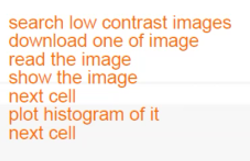

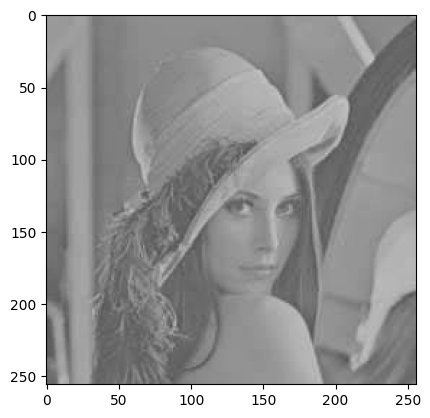

In [222]:
url = "./images/low.jpeg"
# opening Image
low_og_img = io.imread(url)
low_gray_image = cv.cvtColor(low_og_img,cv.COLOR_BGR2GRAY)
# Converting the image file to a matrix
low_img = np.array(low_og_img)
low_img = low_img.astype("int")
plt.imshow(low_img)

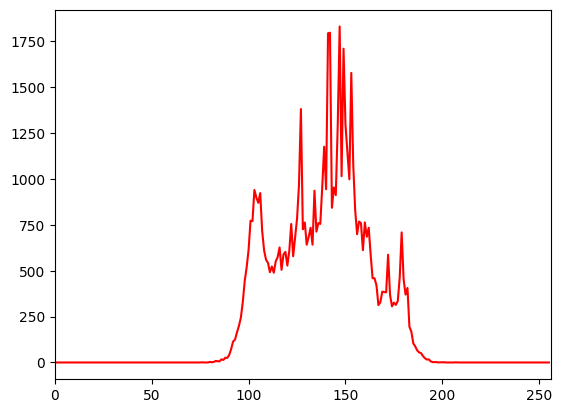

In [223]:
color_channels = ('b', 'g', 'r')
color_channels = ('r')

# Calculate and plot histograms for each color channel
for i, color_channel in enumerate(color_channels):
    # Calculate histogram for the current color channel
    histogram = cv.calcHist([low_og_img], [i], None, [256], [0, 256])

    # Plot the histogram using the corresponding color
    plt.plot(histogram, color=color_channel)
# Set the x-axis limits for the plot
plt.xlim([0, 256])

# Show the plot
plt.show()




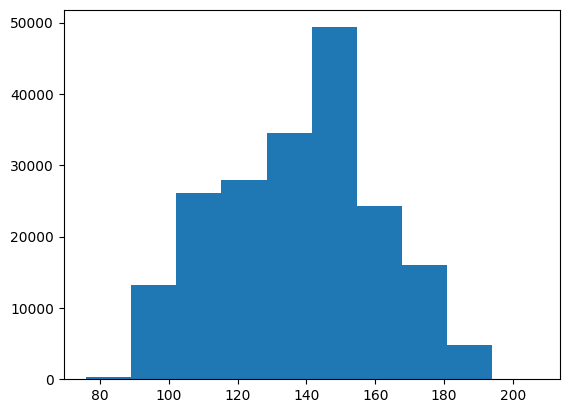

In [224]:
low_hist = plt.hist(low_img.ravel())
low_hist_equalis = cv.equalizeHist(low_gray_image)

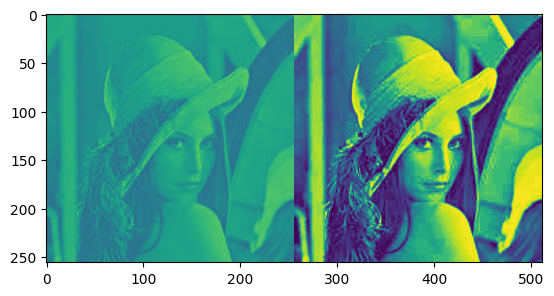

In [225]:
plt.imshow(np.hstack([low_gray_image,low_hist_equalis]))


In [226]:
print(type(low_gray_image))
print(low_gray_image.shape)


<class 'numpy.ndarray'>
(256, 256)


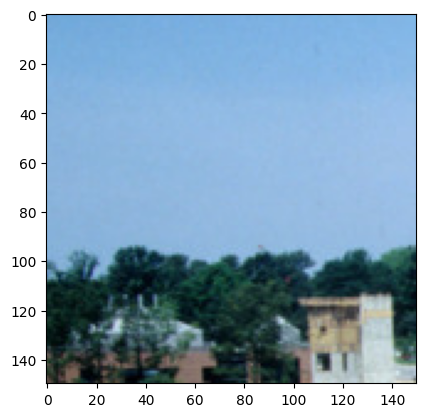

In [227]:
h1 = 50
h2 = 200
w1 = 200
w2 = 50
cropped_img = og_img[h1:w1,h1:w1]
plt.imshow(cropped_img)

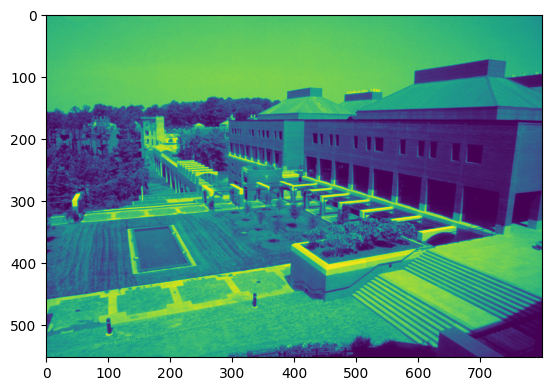

In [235]:
# cropped_img = og_img[h1:w1,h1:w1]
plt.imshow(gray_image)


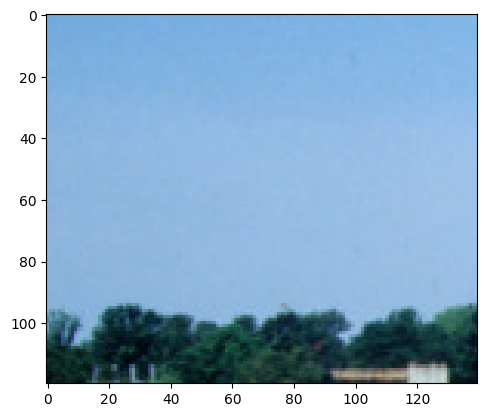

In [242]:
cropped_img = og_img[h1:w1,h1:w1]
plt.imshow(cropped_img[0:120,10:150])

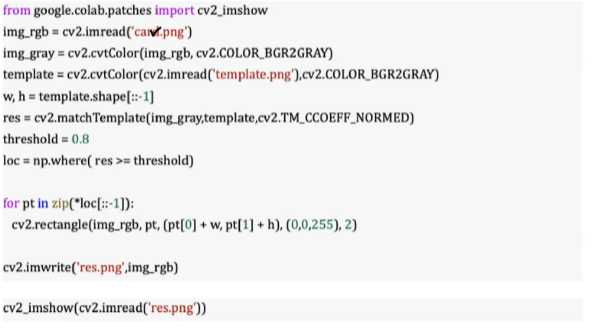

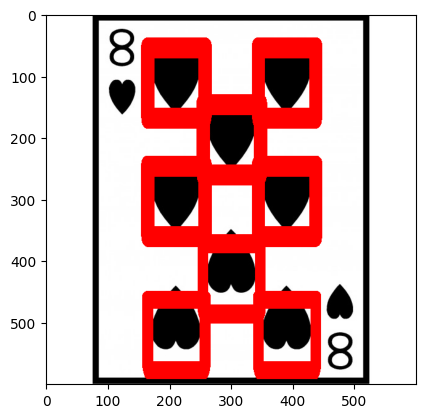

In [249]:
card_img = cv.imread('./images/card.jpeg')
img_gray = cv.cvtColor(card_img,cv.COLOR_BGR2GRAY)
template = cv.cvtColor(cv.imread('./images/temp.png'),cv.COLOR_BGR2GRAY)
w,h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCORR_NORMED)
thre = 0.8
loc = np.where(res >= thre)

for pt in zip(*loc[::-1]):
    cv.rectangle(card_img,pt,(pt[0]+ w,pt[1]+h),(0,0,255),2)
cv.imwrite('res.png',card_img)
plt.imshow(plt.imread('./res.png'))

In [250]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float